# Centre-Back Analysis 
### Analysing Centre-Backs from the Big 5 Leagues who are involved in the build-up phase.

#### Roadmap :
#### 1. Data Importing - Importing combined csv files from Fbref 
#### 2. Data Cleaning - Text alterations, Column filtering, Duplicates deletion
#### 3. Data Filtering - Column creation, Position selection
#### 4. Data Engineering - Weighted average per league
#### 5. Data Visualization 

In [187]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pathlib import Path
from matplotlib import font_manager as fm
import pyglet

In [188]:
#Importing csv file

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

df = pd.read_csv("Book1.csv")
df

Player   Pos            Squad  \
0                       Max Aarons\774cf58b    DF     Norwich City   
1                 Yunis Abdelhamid\32c2d95f    DF            Reims   
2                Salis Abdul Samed\82464ce3    MF    Clermont Foot   
3                  Laurent Abergel\31626657    MF          Lorient   
4                      Charles Abi\469d3d84    FW    Saint-Étienne   
5                   Dickson Abiama\cadd666a    FW   Greuther Fürth   
6                   Matthis Abline\0e46fa2f    FW           Rennes   
7                    Tammy Abraham\f586779e    FW             Roma   
8                       Luis Abram\1f462f95    DF          Granada   
9                 Francesco Acerbi\b96b595c    DF            Lazio   
10                     Ragnar Ache\dc38e3bc  FWMF   Eint Frankfurt   
11                    Marcos Acuña\81442ecb    DF          Sevilla   
12                       Che Adams\f2bf1b0f    FW      Southampton   
13                     Tyler Adams\2b09d998    MF       RB Leipzig   
14                  Sargis Adamyan\22919e97  FWMF       Hoffenheim   
15                  Martin Adeline\7587446d  FWMF            Reims   
16                      Amine Adli\dcfb17f4  FWMF       Leverkusen   
17                     Yacine Adli\26777636  MFFW         Bordeaux   
18                Michel Aebischer\f9c927de    MF          Bologna   
19                Felix Afena-Gyan\0154d290    FW             Roma   
20            Martin Agirregabiria\355c883a    DF           Alavés   
21              Julen Agirrezabala\a2c1a8d3    GK    Athletic Club   
22                   Lucien Agoume\8bc8829a    MF            Brest   
23                   Kevin Agudelo\46fa7204  FWMF           Spezia   
24                    Nayef Aguerd\288e1e13    DF           Rennes   
25                   Sergio Agüero\4d034881    FW        Barcelona   
26                   Ruben Aguilar\3dd738a1    DF           Monaco   
27                  Álvaro Aguirre\93b054dc    FW   Rayo Vallecano   
28                Naouirou Ahamada\a6c58494    MF        Stuttgart   
29                Anel Ahmedhodzic\eab957a3    DF         Bordeaux   
30               Jean-Eudes Aholou\48b28bfd    MF       Strasbourg   
31                    Joseph Aidoo\18abe173    DF       Celta Vigo   
32                        Ola Aina\246d153b    DF           Torino   
33                 Rayan Aït Nouri\9b398aea    DF           Wolves   
34                 Kristoffer Ajer\a8c0acb7    DF        Brentford   
35                 Ludovic Ajorque\462475ed    FW       Strasbourg   
36                   Manuel Akanji\89ac64a6    DF         Dortmund   
37                    Carlos Akapo\f2a68b97    DF            Cádiz   
38                      Marley Aké\414e1f69    FW         Juventus   
39                      Nathan Aké\eaeca114    DF  Manchester City   
40                  Ilias Akhomach\b8bd60fe    FW        Barcelona   
41               Maghnes Akliouche\b625b241  MFFW           Monaco   
42                   Paul Akouokou\31f5b89b    MF            Betis   
43          Jean-Daniel Akpa-Akpro\fdf4b948    MF            Lazio   
44                  Kevin Akpoguma\6ec6fde0    DF       Hoffenheim   
45                     David Alaba\05439de2    DF      Real Madrid   
46                Sofiane Alakouch\5314e067  DFMF             Metz   
47                   Tomás Alarcón\99ea2ddd    MF            Cádiz   
48                    Lucas Alario\834d0be5    FW       Leverkusen   
49                      Jordi Alba\4601e194    DF        Barcelona   
50                    Josué Albert\3d738df0    DF    Clermont Foot   
51                    Luis Alberto\5294a83f    MF            Lazio   
52                     Raúl Albiol\4bd414c1    DF       Villarreal   
53                 Marc Albrighton\b827d5b3  FWDF   Leicester City   
54                    Paco Alcácer\a7a9d95a    FW       Villarreal   
55                Thiago Alcántara\77e84962    MF        Liverpool   
56                   Rubén Alcaraz\036bba5f    

In [189]:
#Data Cleaning Names & Competition

try:
    for names in range(len(df["Player"])):
        df["Player"][names] = df["Player"][names].split("\\", 1)[0] 

    for league in range(len(df["Comp"])):
        df["Comp"][league] = df["Comp"][league].split(" ", 1)[1]
        
except AttributeError:
    None

/Users/rao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/rao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [190]:
df.head()

Player Pos          Squad            Comp    Born   90s  TotCmp  \
0         Max Aarons  DF   Norwich City  Premier League  2000.0  23.6    32.6   
1   Yunis Abdelhamid  DF          Reims         Ligue 1  1987.0  22.1    38.7   
2  Salis Abdul Samed  MF  Clermont Foot         Ligue 1  2000.0  21.1    57.9   
3    Laurent Abergel  MF        Lorient         Ligue 1  1993.0  21.2    41.4   
4        Charles Abi  FW  Saint-Étienne         Ligue 1  2000.0   0.5     4.0   

   TotAtt  TotCmp%  TotDist  TotPrgDist  ShtCmp  ShtAtt  ShtCmp%  MedCmp  \
0    43.6     74.9    554.2       204.2    16.4    18.1     90.6    12.8   
1    47.1     82.1    837.8       292.0    10.4    11.7     88.8    22.3   
2    63.0     91.9   1081.7       183.2    22.9    24.5     93.6    27.0   
3    50.5     81.9    798.0       203.1    16.4    18.4     89.0    18.0   
4    12.0     33.3     48.0         0.0     2.0     4.0     50.0     2.0   

   MedAtt  MedCmp%  LngCmp  LngAtt  LngCmp%   Ast    xA  A-xA    KP  TotPass  \
0    16.7     76.2    3.01    6.91     43.6  0.04  0.04  0.00  0.55     32.6   
1    24.9     89.3    5.88    9.10     64.7  0.00  0.01 -0.01  0.27     38.7   
2    28.5     94.7    7.11    8.34     85.2  0.00  0.04 -0.04  0.43     57.9   
3    20.2     88.8    6.42    9.53     67.3  0.05  0.08 -0.04  0.75     41.4   
4     6.0     33.3    0.00    0.00      NaN  0.00  0.00  0.00  0.00      4.0   

   1/3Prog   PPA  CrsPA  Prog  TotCar  ProgCar   Left  Right  
0     1.57  1.23   0.30  3.09   192.0    117.2   4.87   27.7  
1     2.26  0.18   0.00  2.40   203.2    111.5  31.80   12.1  
2     2.46  0.24   0.00  2.37   257.3    108.8   4.98   55.1  
3     3.82  0.61   0.28  3.87   180.7     90.1   4.15   45.1  
4     0.00  0.00   0.00  0.00   118.0     18.0  12.00    0.0

In [191]:
#Calculating total live passes, filtering data for Defenders and minimum 90s played

df["TotalLive"] = df["Left"] + df["Right"]
df = df[df["Pos"] == "DF"]

df = df[df["90s"] > 8] 
df.reset_index(inplace = True, drop = True)

In [193]:
#Calculating difference in left-footed and right-footed passes & assigning stronger foot for each player

df["RlDiff"] = abs(df["Left"] - df["Right"])
df["LegDominance"] = np.where(df["Left"] > df["Right"], "Left-footed", "Right-footed")

In [194]:
df

Player Pos            Squad            Comp  \
0                      Max Aarons  DF     Norwich City  Premier League   
1                Yunis Abdelhamid  DF            Reims         Ligue 1   
2                Francesco Acerbi  DF            Lazio         Serie A   
3                    Marcos Acuña  DF          Sevilla         La Liga   
4            Martin Agirregabiria  DF           Alavés         La Liga   
5                    Nayef Aguerd  DF           Rennes         Ligue 1   
6                   Ruben Aguilar  DF           Monaco         Ligue 1   
7                    Joseph Aidoo  DF       Celta Vigo         La Liga   
8                        Ola Aina  DF           Torino         Serie A   
9                 Rayan Aït Nouri  DF           Wolves  Premier League   
10                Kristoffer Ajer  DF        Brentford  Premier League   
11                  Manuel Akanji  DF         Dortmund      Bundesliga   
12                   Carlos Akapo  DF            Cádiz         La Liga   
13                 Kevin Akpoguma  DF       Hoffenheim      Bundesliga   
14                    David Alaba  DF      Real Madrid         La Liga   
15                     Jordi Alba  DF        Barcelona         La Liga   
16                    Raúl Albiol  DF       Villarreal         La Liga   
17                  Omar Alderete  DF         Valencia         La Liga   
18         Trent Alexander-Arnold  DF        Liverpool  Premier League   
19                  Marcos Alonso  DF          Chelsea  Premier League   
20                  Yeray Álvarez  DF    Athletic Club         La Liga   
21                 Daniel Amartey  DF   Leicester City  Premier League   
22                   Kelvin Amian  DF           Spezia         Serie A   
23               Joachim Andersen  DF   Crystal Palace  Premier League   
24                       Angeliño  DF       RB Leipzig      Bundesliga   
25                 Waldemar Anton  DF        Stuttgart      Bundesliga   
26                  Dennis Appiah  DF           Nantes         Ligue 1   
27                  Néstor Araujo  DF       Celta Vigo         La Liga   
28                  Ronald Araújo  DF        Barcelona         La Liga   
29                    Youcef Atal  DF             Nice         Ligue 1   
30                Tommaso Augello  DF        Sampdoria         Serie A   
31                    Luke Ayling  DF     Leeds United  Premier League   
32              César Azpilicueta  DF          Chelsea  Premier League   
33                      Loïc Bade  DF           Rennes         Ligue 1   
34              Benoît Badiashile  DF           Monaco         Ligue 1   
35                 Mitchel Bakker  DF       Leverkusen      Bundesliga   
36               Mikel Balenziaga  DF    Athletic Club         La Liga   
37               Leonardo Balerdi  DF        Marseille         Ligue 1   
38                    Iván Balliu  DF   Rayo Vallecano         La Liga   
39                    Melvin Bard  DF             Nice         Ligue 1   
40          Jacob Barrett Laursen  DF          Arminia      Bundesliga   
41                    Marc Bartra  DF            Betis         La Liga   
42             Alessandro Bastoni  DF            Inter         Serie A   
43               Maximilian Bauer  DF   Greuther Fürth      Bundesliga   
44                 Timo Baumgartl  DF     Union Berlin      Bundesliga   
45                  Rodrigo Becão  DF          Udinese         Serie A   
46                   Jan Bednarek  DF      Southampton  Premier League   
47                    Stefan Bell  DF         Mainz 05      Bundesliga   
48            Armel Bella Kotchap  DF           Bochum      Bundesliga   
49                Raoul Bellanova  DF         Cagliari         Serie A   
50                Héctor Bellerín  DF            Betis         La Liga   
51                Ramy Bensebaini  DF       M'Gladbach      Bundesliga   
52            Bartosz Bereszyński  DF        Sampdoria         Serie A   
53               Giulian Bianco

In [195]:
#Importing csv containg detailed player positions

df1 = pd.read_csv("Player_Positions_FBRef.csv")
df1 

Name            Position
0                    Ismael Aaneba          Right-Back
1              Patrick van Aanholt           Left-Back
2                      Issah Abbas      Centre-Forward
3                 Yunis Abdelhamid         Centre-Back
4                    Sabit Abdulai    Central Midfield
5                      Mehdi Abeid    Central Midfield
6                  Laurent Abergel  Defensive Midfield
7                      Charles Abi      Centre-Forward
8                   Matthis Abline      Centre-Forward
9                  Pape Abou Cisse         Centre-Back
10                   David Abraham         Centre-Back
11                   Tammy Abraham      Centre-Forward
12                    Amir Abrashi  Defensive Midfield
13                Gennaro Acampora    Central Midfield
14                Francesco Acerbi         Centre-Back
15                     Ragnar Ache      Centre-Forward
16                    Marcos Acuña           Left-Back
17                       Che Adams      Centre-Forward
18                     Tyler Adams  Defensive Midfield
19                  Sargis Adamyan      Centre-Forward
20                Tosin Adarabioyo         Centre-Back
21                  Bobby Adekanye        Right Winger
22                     Yacine Adli  Attacking Midfield
23                 Andrea Adorante      Centre-Forward
24                          Adrián          Goalkeeper
25            Martin Agirregabiria          Right-Back
26                   Lucien Agoume  Defensive Midfield
27                       Felix Agu           Left-Back
28                   Kevin Agudelo        Right Winger
29                    Nayef Aguerd         Centre-Back
30                   Sergio Agüero      Centre-Forward
31                   Ruben Aguilar          Right-Back
32                Naouirou Ahamada  Defensive Midfield
33                  Matteo Ahlinvi  Defensive Midfield
34            Cheikh Ahmadou Dieng      Centre-Forward
35               Jean-Eudes Aholou  Defensive Midfield
36               Jean-Eudes Aholou  Defensive Midfield
37                    Joseph Aidoo         Centre-Back
38                        Ola Aina          Right-Back
39                 Rayan Aït Nouri           Left-Back
40                 Rayan Aït Nouri           Left-Back
41                      Semi Ajayi         Centre-Back
42                 Ludovic Ajorque      Centre-Forward
43                   Manuel Akanji         Centre-Back
44                    Carlos Akapo          Right-Back
45                      Marley Aké         Left Winger
46                      Nathan Aké         Centre-Back
47                   Paul Akouokou    Central Midfield
48          Jean-Daniel Akpa-Akpro    Central Midfield
49                  Kevin Akpoguma         Centre-Back
50                     David Alaba         Centre-Back
51                Sofiane Alakouch          Right-Back
52                      Jony Álamo    Central Midfield
53                    Lucas Alario      Centre-Forward
54                      Jordi Alba           Left-Back
55                    Luis Alberto    Central Midfield
56                     Raúl Albiol         Centre-Back
57                 Marc Albrighton      Right Midfield
58                    Paco Alcácer      Centre-Forward
59                    Pedro Alcalá         Centre-Back
60                Thiago Alcántara    Central Midfield
61                   Rubén Alcaraz    Central Midfield
62                   Omar Alderete         Centre-Back
63               Toby Alderweireld         Centre-Back
64                      Iván Alejo        Right Winger
65                    Carles Aleñá    Central Midfield
66                    Carles Aleñá    Central Midfield
67            Rúnar Alex Rúnarsson          Goalkeeper
68          Trent Alexander-Arnold          Right-Back
69                           Alfon         Left Winger
70                 Mohamed Ali Cho        Right Winger
71                  Ezgjan Alioski           Left-Back
72             

In [196]:
#Dropping duplicates

df1.drop_duplicates(subset = ["Name", "Position"], inplace = True)
df1.reset_index(drop = True, inplace = True)

In [197]:
df1.describe() 
#I find that data is duplicated for the player Nacho 

Name     Position
count    2806         2806
unique   2805           16
top     Nacho  Centre-Back
freq        2          531

In [198]:
#Merging dataframe df and df1

df = pd.merge(left = df, right = df1, how = "left", left_on = "Player", right_on = "Name")

In [199]:
#Removing duplicate data for the player - NACHO 

try:
    df = df.loc[~((df["Name"] == "Nacho") & (df["Position"] == "Left-Back") & (df["Squad"] == "Real Madrid"))]
    df.reset_index(inplace = True, drop = True)
except: 
    None

In [200]:
#Background colour for visualization

background = "#1d2849"

In [201]:
#Filtering data for centre-backs

df = df[df["Position"] == "Centre-Back"]
df.reset_index(inplace = True, drop = True)

In [202]:
df

Player Pos            Squad            Comp    Born  \
0            Yunis Abdelhamid  DF            Reims         Ligue 1  1987.0   
1            Francesco Acerbi  DF            Lazio         Serie A  1988.0   
2                Nayef Aguerd  DF           Rennes         Ligue 1  1996.0   
3                Joseph Aidoo  DF       Celta Vigo         La Liga  1995.0   
4             Kristoffer Ajer  DF        Brentford  Premier League  1998.0   
5               Manuel Akanji  DF         Dortmund      Bundesliga  1995.0   
6              Kevin Akpoguma  DF       Hoffenheim      Bundesliga  1995.0   
7                 David Alaba  DF      Real Madrid         La Liga  1992.0   
8                 Raúl Albiol  DF       Villarreal         La Liga  1985.0   
9               Omar Alderete  DF         Valencia         La Liga  1996.0   
10              Yeray Álvarez  DF    Athletic Club         La Liga  1995.0   
11           Joachim Andersen  DF   Crystal Palace  Premier League  1996.0   
12             Waldemar Anton  DF        Stuttgart      Bundesliga  1996.0   
13              Néstor Araujo  DF       Celta Vigo         La Liga  1991.0   
14              Ronald Araújo  DF        Barcelona         La Liga  1999.0   
15                  Loïc Bade  DF           Rennes         Ligue 1  2000.0   
16          Benoît Badiashile  DF           Monaco         Ligue 1  2001.0   
17           Leonardo Balerdi  DF        Marseille         Ligue 1  1999.0   
18                Marc Bartra  DF            Betis         La Liga  1991.0   
19         Alessandro Bastoni  DF            Inter         Serie A  1999.0   
20           Maximilian Bauer  DF   Greuther Fürth      Bundesliga  2000.0   
21             Timo Baumgartl  DF     Union Berlin      Bundesliga  1996.0   
22              Rodrigo Becão  DF          Udinese         Serie A  1996.0   
23               Jan Bednarek  DF      Southampton  Premier League  1996.0   
24                Stefan Bell  DF         Mainz 05      Bundesliga  1991.0   
25        Armel Bella Kotchap  DF           Bochum      Bundesliga  2001.0   
26                Pedro Bigas  DF            Elche         La Liga  1990.0   
27            Davide Biraschi  DF            Genoa         Serie A  1994.0   
28             Jérôme Boateng  DF             Lyon         Ligue 1  1988.0   
29             Kevin Bonifazi  DF          Bologna         Serie A  1996.0   
30           Leonardo Bonucci  DF         Juventus         Serie A  1987.0   
31         Sebastiaan Bornauw  DF        Wolfsburg      Bundesliga  1999.0   
32                Sven Botman  DF            Lille         Ligue 1  2000.0   
33             Dedryck Boyata  DF       Hertha BSC      Bundesliga  1990.0   
34            Lilian Brassier  DF            Brest         Ligue 1  1999.0   
35             Gleison Bremer  DF           Torino         Serie A  1997.0   
36                Dylan Bronn  DF             Metz         Ligue 1  1995.0   
37                John Brooks  DF        Wolfsburg      Bundesliga  1993.0   
38      Alessandro Buongiorno  DF           Torino         Serie A  1999.0   
39                   Dan Burn  DF         Brighton  Premier League  1992.0   
40            Leandro Cabrera  DF         Espanyol         La Liga  1991.0   
41             Martín Cáceres  DF         Cagliari         Serie A  1987.0   
42                       Cala  DF            Cádiz         La Liga  1989.0   
43             Mattia Caldara  DF          Venezia         Serie A  1994.0   
44            Duje Ćaleta-Car  DF        Marseille         Ligue 1  1996.0   
45             Andrea Carboni  DF         Cagliari         Serie A  2001.0   
46               Diego Carlos  DF          Sevilla         La Liga  1993.0   
47              Nicolò Casale  DF    Hellas Verona         Serie A  1998.0   
48   Jean-Charles Castelletto  DF           Nantes         Ligue 1  1995.0   
49                     Catena  DF   Rayo Vallecano         La Liga  1994.0   
50             Craig Cathcart  DF          Wa

In [203]:
#Calculating % for progressive passes and carries

df["1/3Prog%"] = (df["1/3Prog"]/df["TotPass"])*100
df["ProgCar%"] = (df["ProgCar"]/df["TotCar"])*100

In [204]:
#Sorting values in descending order based on the specified columns

df.sort_values(by = ["1/3Prog", "1/3Prog%", "MedCmp%", "ProgCar", "ProgCar%", "ShtCmp%"], axis=0,                 
                    ascending = [False, False, False, False, False, False], inplace = True, ignore_index=True)

In [205]:
df

Player Pos            Squad            Comp    Born  \
0             Aymeric Laporte  DF  Manchester City  Premier League  1994.0   
1             Dayot Upamecano  DF    Bayern Munich      Bundesliga  1998.0   
2                 Eric García  DF        Barcelona         La Liga  2001.0   
3                  Rúben Dias  DF  Manchester City  Premier League  1997.0   
4                Adam Webster  DF         Brighton  Premier League  1995.0   
5            Presnel Kimpembe  DF        Paris S-G         Ligue 1  1995.0   
6                Thiago Silva  DF          Chelsea  Premier League  1984.0   
7              Joško Gvardiol  DF       RB Leipzig      Bundesliga  2002.0   
8             Antonio Rüdiger  DF          Chelsea  Premier League  1993.0   
9           Benoît Badiashile  DF           Monaco         Ligue 1  2001.0   
10            Jonathan Gradit  DF             Lens         Ligue 1  1992.0   
11                 Joël Matip  DF        Liverpool  Premier League  1991.0   
12             Facundo Medina  DF             Lens         Ligue 1  1999.0   
13        Andreas Christensen  DF          Chelsea  Premier League  1996.0   
14             William Saliba  DF        Marseille         Ligue 1  2001.0   
15                 Marquinhos  DF        Paris S-G         Ligue 1  1994.0   
16               Rafael Tolói  DF         Atalanta         Serie A  1990.0   
17                Niklas Süle  DF    Bayern Munich      Bundesliga  1995.0   
18               Gerard Piqué  DF        Barcelona         La Liga  1987.0   
19               Romain Saïss  DF           Wolves  Premier League  1990.0   
20                 Pau Torres  DF       Villarreal         La Liga  1997.0   
21            Virgil van Dijk  DF        Liverpool  Premier League  1991.0   
22              Manuel Akanji  DF         Dortmund      Bundesliga  1995.0   
23          Marc-Oliver Kempf  DF        Stuttgart      Bundesliga  1995.0   
24           Francesco Acerbi  DF            Lazio         Serie A  1988.0   
25               Lucas Perrin  DF       Strasbourg         Ligue 1  1998.0   
26            Duje Ćaleta-Car  DF        Marseille         Ligue 1  1996.0   
27         Luan Peres Petroni  DF        Marseille         Ligue 1  1994.0   
28                David Alaba  DF      Real Madrid         La Liga  1992.0   
29          Giorgio Chiellini  DF         Juventus         Serie A  1984.0   
30          Jean-Clair Todibo  DF             Nice         Ligue 1  1999.0   
31            Mohammed Salisu  DF      Southampton  Premier League  1999.0   
32             Jérôme Boateng  DF             Lyon         Ligue 1  1988.0   
33         Alessandro Bastoni  DF            Inter         Serie A  1999.0   
34                Axel Disasi  DF           Monaco         Ligue 1  1998.0   
35                       Igor  DF       Fiorentina         Serie A  1998.0   
36                 Kevin Vogt  DF       Hoffenheim      Bundesliga  1991.0   
37              Arthur Theate  DF          Bologna         Serie A  2000.0   
38           Joachim Andersen  DF   Crystal Palace  Premier League  1996.0   
39             Rafael Czichos  DF             Köln      Bundesliga  1990.0   
40              Harry Maguire  DF   Manchester Utd  Premier League  1993.0   
41          Guillermo Maripán  DF           Monaco         Ligue 1  1994.0   
42         Jean-Kevin Duverne  DF            Brest         Ligue 1  1997.0   
43                 Hiroki Ito  DF        Stuttgart      Bundesliga  1999.0   
44              Mario Hermoso  DF  Atlético Madrid         La Liga  1995.0   
45         Nico Schlotterbeck  DF         Freiburg      Bundesliga  1999.0   
46          Kalidou Koulibaly  DF           Napoli         Serie A  1991.0   
47               Éder Militão  DF      Real Madrid         La Liga  1998.0   
48      Lucas Martínez Quarta  DF       Fiorentina         Serie A  1996.0   
49    Konstantinos Mavropanos  DF        Stuttgart      Bundesliga  1997.0   
50                John Brooks  DF        Wolf

In [206]:
#Creating new dataframe from df

df_league = df[["Comp", "ShtCmp%", "MedCmp%", "1/3Prog", "1/3Prog%" ,"ProgCar", "ProgCar%"]]
df_league = df_league.set_index("Comp")
df_league

ShtCmp%  MedCmp%  1/3Prog   1/3Prog%  ProgCar   ProgCar%
Comp                                                                    
Premier League     96.5     97.3    11.00  12.987013    300.5  68.890417
Bundesliga         93.0     93.2     8.01   9.864532    229.6  51.746676
La Liga            94.4     94.1     7.50  10.822511    243.8  63.341128
Premier League     95.2     96.9     6.65   8.636364    235.8  61.857293
Premier League     88.7     92.3     6.54  10.348101    220.6  64.090645
Ligue 1            97.7     97.9     6.54   8.054187    210.0  55.002619
Premier League     96.7     95.5     6.22   8.614958    207.3  61.806798
Bundesliga         90.8     90.2     6.20   9.904153    157.8  54.170958
Premier League     93.7     93.0     6.17  10.300501    154.8  59.607239
Ligue 1            94.7     93.6     6.16   8.180611    159.8  56.446485
Ligue 1            93.0     94.3     6.11  11.068841    188.9  63.903924
Premier League     91.3     94.5     6.10   9.214502    238.3  68.418030
Ligue 1            95.1     93.0     6.00   8.333333    214.7  61.536257
Premier League     91.9     92.4     5.79   9.089482    124.0  54.409829
Ligue 1            94.5     96.6     5.79   7.301387    241.4  59.975155
Ligue 1            96.1     96.8     5.65   7.935393    208.9  59.262411
Serie A            91.8     89.6     5.41  11.389474    101.0  52.467532
Bundesliga         95.4     92.7     5.31   7.314050    190.9  55.030268
La Liga            89.7     95.4     5.29   8.559871    178.9  58.159948
Premier League     90.4     87.9     5.28  12.137931     81.5  51.097179
La Liga            90.9     93.0     5.09   9.073084    228.3  64.183301
Premier League     93.3     96.0     5.09   7.747336    109.5  53.052326
Bundesliga         92.6     96.4     5.06   7.259684    176.7  50.399315
Bundesliga         90.6     88.5     5.05   9.824903    125.4  55.807744
Serie A            93.9     94.5     5.03   7.529940    169.8  58.270419
Ligue 1            94.1     92.4     4.92  11.031390    150.4  63.007960
Ligue 1            98.1     95.5     4.85   6.643836    171.1  56.824975
Ligue 1            94.4     90.0     4.81   8.194208    154.0  58.778626
La Liga            96.8     94.8     4.80   7.779579    190.9  54.761905
Serie A            91.3     88.3     4.76   8.880597    140.6  58.267717
Ligue 1            92.6     95.3     4.71   7.696078    159.3  48.955132
Premier League     85.6     85.9     4.65  11.124402    113.2  48.027153
Ligue 1            92.8     95.2     4.63   8.194690    139.5  52.981390
Serie A            93.6     93.5     4.62   7.310127    152.1  60.047375
Ligue 1            93.0     93.5     4.56   8.216216    196.0  62.659847
Serie A            91.0     95.4     4.56   6.765579    169.9  57.379264
Bundesliga         92.9     94.9     4.51   6.583942    189.0  57.013575
Serie A            93.3     90.5     4.48   8.942116    141.0  53.940321
Premier League     90.6     94.4     4.43   7.840708    132.9  48.574561
Bundesliga         81.5     92.0     4.42   7.892857    189.9  55.689150
Premier League     91.6     90.8     4.30   9.148936    145.4  54.579580
Ligue 1            93.5     95.4     4.30   7.072368    133.3  55.750732
Ligue 1            85.2     81.2     4.29  10.337349    134.9  62.165899
Bundesliga         90.8     91.8     4.29   7.258883    134.2  47.724040
La Liga            93.4     90.2     4.28   8.000000    123.6  57.354988
Bundesliga         88.4     91.4     4.21   9.813520    140.7  64.364135
Serie A            93.3     94.1     4.20   7.540395    132.9  57.358653
La Liga            93.8     93.9     4.17   7.765363    128.0  50.854191
Serie A            92.7     96.7     4.14   6.388889    207.4  50.388727
Bundesliga         92.1     85.4     4.12   8.126233    110.9  52.311321
Bundesliga         92.2     92.3     4.03   7.720307    128.5  50.610477
Serie A            93.3     92.6     4.01   6.762226    146.0  62.500000
Ligue 1            89.7     89.3     4.00   9.732360    123.3  61.557664
S

## Data Engineering 
### Creating a league-wise weighted average column which assesses all the players based on the specific categories: 
#### 1. Progressive passes - Completed passes that enter 1/3rd of the pitch closest to the goal
#### 2. Progressive pass % - Percentage of progressive passes out of total completed passes
#### 3. Medium pass % - Percentage of completed passes between 15 to 30 yards
#### 4. Progressive carries - Carries that enter 1/3rd of the pitch closest to the goal
#### 5. Progressive carry % - Percentage of progressive carries out of total carries
#### 6. Short pass % - Percentage of completed passes between 5 to 15 yards

##### These specific metrics are chosen as I felt they can be used to asses the quality and involvement of a Centre-Back during a build-up phase. 
##### Their involvement is measured through pass completion success rate, progression towards the opposition goal through passes and carries.

In [208]:
#Normalizing the dataframe df_league to get values between 0 to 1

df_league = (df_league - df_league.min())/(df_league.max() - df_league.min())

#Grouping the dataframe by league with mean values
df_league = df_league.groupby("Comp").mean()

#Sorting values in descending order
df_league.sort_values(by = ["1/3Prog", "1/3Prog%", "MedCmp%", "ProgCar", "ProgCar%", "ShtCmp%"], axis=0,                 
                     ascending = [False, False, False, False, False, False], inplace = True, ignore_index=False)
df_league

ShtCmp%   MedCmp%   1/3Prog  1/3Prog%   ProgCar  ProgCar%
Comp                                                                      
Premier League  0.635802  0.696436  0.242582  0.374912  0.306393  0.610570
Ligue 1         0.750172  0.777550  0.234589  0.312225  0.360587  0.643585
Bundesliga      0.579844  0.710787  0.226178  0.325393  0.322372  0.526610
Serie A         0.681593  0.735024  0.209007  0.325924  0.278253  0.551109
La Liga         0.652642  0.717170  0.178925  0.308740  0.269572  0.564959

In [209]:
#Assigning weights to the parameters (out of 5)

m1 = 5 
m2 = 4
m3 = 3
m4 = 4
m5 = 3
m6 = 1

df_league["wt_avg_ar"] = round((m1*df_league["1/3Prog"] + m2*df_league["1/3Prog%"] + m3*df_league["MedCmp%"] + m4*df_league["ProgCar"] \
            + m5*df_league["ProgCar%"] + m5*df_league["ShtCmp%"])/(m1+m2+m3+m4+m5), 2)

In [210]:
df_league

ShtCmp%   MedCmp%   1/3Prog  1/3Prog%   ProgCar  ProgCar%  \
Comp                                                                         
Premier League  0.635802  0.696436  0.242582  0.374912  0.306393  0.610570   
Ligue 1         0.750172  0.777550  0.234589  0.312225  0.360587  0.643585   
Bundesliga      0.579844  0.710787  0.226178  0.325393  0.322372  0.526610   
Serie A         0.681593  0.735024  0.209007  0.325924  0.278253  0.551109   
La Liga         0.652642  0.717170  0.178925  0.308740  0.269572  0.564959   

                wt_avg_ar  
Comp                       
Premier League       0.51  
Ligue 1              0.55  
Bundesliga           0.48  
Serie A              0.49  
La Liga              0.47

### Top 5 Centre-Backs involved in the build-up phase are:
#### 1. Ayemeric Laporte (Pep tax)
#### 2. Dayot Upamecano 
#### 3. Eric Garcia 
#### 4. Ruben Dias (Pep tax again lol)
#### 5. Adam Webster (Graham Potter's tactical changes at Brighton)

##### Note: The data provides us these top 5 players due to the evaluation based on the chosen metrics. Changing the weights and order can provide different results! Additionally, the data only includes this season (small sample size). Including data from past seasons will provide us with a better view. 

In [211]:
#Filtering top 5 players 

df = df[:5]
df

Player Pos            Squad            Comp    Born   90s  TotCmp  \
0  Aymeric Laporte  DF  Manchester City  Premier League  1994.0  20.1    84.7   
1  Dayot Upamecano  DF    Bayern Munich      Bundesliga  1998.0  15.6    81.2   
2      Eric García  DF        Barcelona         La Liga  2001.0  14.8    69.3   
3       Rúben Dias  DF  Manchester City  Premier League  1997.0  22.7    77.0   
4     Adam Webster  DF         Brighton  Premier League  1995.0  13.0    63.2   

   TotAtt  TotCmp%  TotDist  TotPrgDist  ShtCmp  ShtAtt  ShtCmp%  MedCmp  \
0    88.9     95.3   1828.6       534.9    23.4    24.2     96.5    45.9   
1    90.3     89.9   1847.3       580.5    18.8    20.2     93.0    45.5   
2    75.0     92.3   1509.1       478.9    19.2    20.3     94.4    37.8   
3    81.8     94.2   1657.4       432.8    21.2    22.2     95.2    43.0   
4    75.3     84.0   1357.9       470.5    16.8    19.0     88.7    36.1   

   MedAtt  MedCmp%  LngCmp  LngAtt  LngCmp%   Ast    xA  A-xA    KP  TotPass  \
0    47.2     97.3   14.80    16.8     88.4  0.00  0.01 -0.01  0.35     84.7   
1    48.8     93.2   16.50    20.1     81.8  0.26  0.06  0.20  0.45     81.2   
2    40.2     94.1   12.20    13.9     87.4  0.00  0.01 -0.01  0.20     69.3   
3    44.4     96.9   12.70    14.6     87.0  0.13  0.09  0.04  0.48     77.0   
4    39.1     92.3    9.62    15.6     61.6  0.00  0.01 -0.01  0.08     63.2   

   1/3Prog   PPA  CrsPA  Prog  TotCar  ProgCar   Left  Right  TotalLive  \
0    11.00  0.35    0.0  6.47   436.2    300.5  63.40   20.5      83.90   
1     8.01  0.38    0.0  6.03   443.7    229.6   9.87   76.1      85.97   
2     7.50  0.14    0.0  5.88   384.9    243.8  10.30   60.9      71.20   
3     6.65  0.18    0.0  3.96   381.2    235.8  12.70   65.0      77.70   
4     6.54  0.08    0.0  4.54   344.2    220.6  15.40   52.6      68.00   

   RlDiff  LegDominance             Name     Position   1/3Prog%   ProgCar%  
0   42.90   Left-footed  Aymeric Laporte  Centre-Back  12.987013  68.890417  
1   66.23  Right-footed  Dayot Upamecano  Centre-Back   9.864532  51.746676  
2   50.60  Right-footed      Eric García  Centre-Back  10.822511  63.341128  
3   52.30  Right-footed       Rúben Dias  Centre-Back   8.636364  61.857293  
4   37.20  Right-footed     Adam Webster  Centre-Back  10.348101  64.090645

In [212]:
####Find fonts

fm.findSystemFonts(fontpaths=None, fontext="ttf")

['/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansWarangCiti-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Courier New.ttf',
 '/System/Library/Fonts/Supplemental/GillSans.ttc',
 '/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansOgham-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXNonUniIta.otf',
 '/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf',
 '/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc',
 '/System/Library/Fonts/Supplemental/Waseem.ttc',
 '/System/Library/Fonts/Supplemental/Verdana Italic.ttf',
 '/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf',
 '/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf',
 '/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc',
 '/System/Library/Fonts/Supplemental/Nadeem.ttc',
 '/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf',
 '/System/Library/F

In [213]:
font_dirs = ['/Users/rao/Library/Fonts', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

In [214]:
font_list

[<Font 'Rubik' (Rubik-Light.ttf) normal normal light normal>,
 <Font 'Rubik' (Rubik-Regular.ttf) normal normal regular normal>,
 <Font 'Rubik' (Rubik-SemiBold.ttf) normal normal semibold normal>]

In [216]:
#Importing Rubik fonts

f1 = '/Users/rao/Library/Fonts/Rubik-SemiBold.ttf'
title=fm.FontProperties(fname=f1, size = 25)
sidetext = fm.FontProperties(fname=f1, size = 24)

f2 = '/Users/rao/Library/Fonts/Rubik-Regular.ttf'
subtitle = fm.FontProperties(fname=f1, size = 13)

f3 = '/Users/rao/Library/Fonts/Rubik-Light.ttf'
labels = fm.FontProperties(fname=f1)

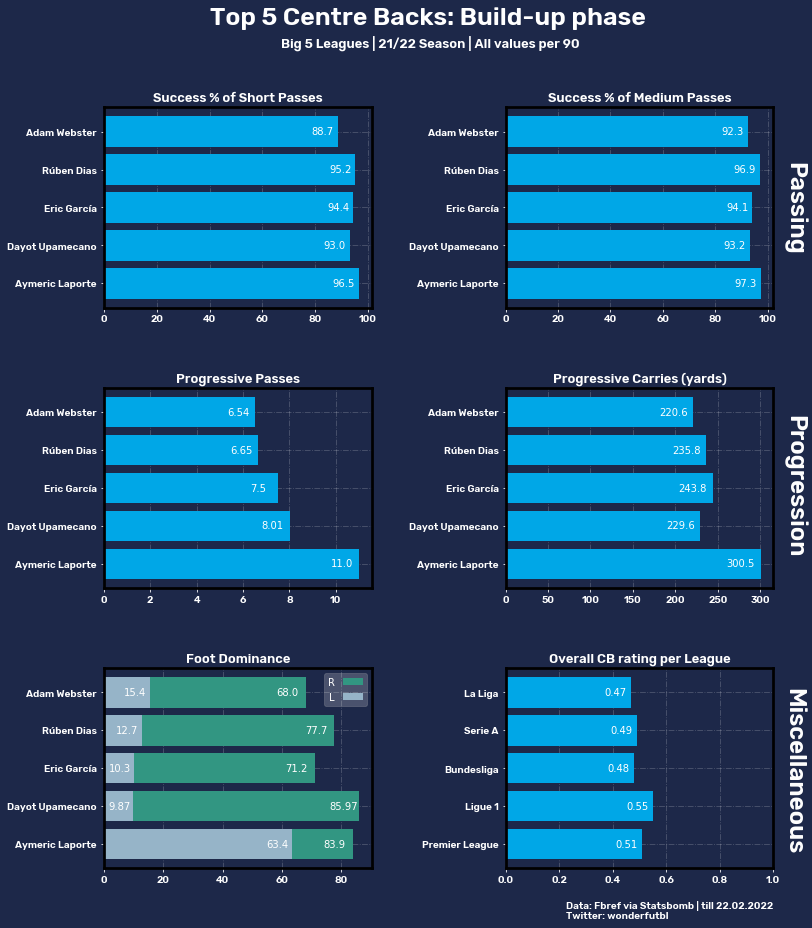

In [236]:
#Data Visualization

fig, axs = plt.subplots(3, 2,figsize = (12,14))
fig.set_facecolor(background)

for ax in axs:
    for subax in ax:
        subax.set_facecolor(background)
        mpl.rcParams['xtick.color'] = 'white'
        mpl.rcParams['ytick.color'] = 'white'
        spines = ['top', 'left', 'right', 'bottom']
        for x in spines :
            if x in spines:
                subax.spines[x].set_linewidth(2.7)
                #subax.spines[x].set_visible(False)
        for label in subax.get_xticklabels():
            label.set_fontproperties(labels)

        for label in subax.get_yticklabels():
            label.set_fontproperties(labels)
                
        
        subax.grid(b = False, color ='white',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2, zorder = -2)
    
plt.subplots_adjust( wspace=0.5, hspace=0.4)

fig.suptitle("Top 5 Centre Backs: Build-up phase", color = "white", fontproperties=title)

    
bar1 = axs[0,0].barh(df.Player, df["ShtCmp%"], zorder = 2, color= "#00a7e7")
bar2 = axs[0,1].barh(df.Player, df["MedCmp%"], zorder = 2, color= "#00a7e7")
bar3 = axs[1,0].barh(df.Player, df["1/3Prog"], zorder = 2, color= "#00a7e7")
bar4 = axs[1,1].barh(df.Player, df["ProgCar"], zorder = 2, color= "#00a7e7")

bar5a = axs[2,0].barh(df.Player, df["TotalLive"], zorder = 2, color= "#329682", label = "R")
bar5b = axs[2,0].barh(df.Player, df["Left"], zorder = 2, color= "#96b4c8", label = "L")
legend = axs[2,0].legend(framealpha = 0.2, markerfirst = False)
for text in legend.get_texts():
    text.set_color("white")

bar6 = axs[2,1].barh(df_league.index, df_league["wt_avg_ar"], zorder = 2, color= "#00a7e7")


for bar in bar1:
    width = bar.get_width()
    ylabel_pos = bar.get_y() + bar.get_height() / 2
    axs[0,0].text(width - 10, ylabel_pos , s=f'{width}', va='center', color = 'white', 
            size = 10, alpha = 1)  

for bar in bar2:
    width = bar.get_width()
    ylabel_pos = bar.get_y() + bar.get_height() / 2
    axs[0,1].text(width - 10, ylabel_pos , s=f'{width}', va='center', color = 'white', 
            size = 10, alpha = 1)

for bar in bar3:
    width = bar.get_width()
    ylabel_pos = bar.get_y() + bar.get_height() / 2
    axs[1,0].text(width - 1.2, ylabel_pos , s=f'{width}', va='center', color = 'white', 
            size = 10, alpha = 1)

for bar in bar4:
    width = bar.get_width()
    ylabel_pos = bar.get_y() + bar.get_height() / 2
    axs[1,1].text(width - 40, ylabel_pos , s=f'{width}', va='center', color = 'white', 
            size = 10, alpha = 1)

for bar in bar5a:
    width = bar.get_width()
    ylabel_pos = bar.get_y() + bar.get_height() / 2
    axs[2,0].text(width - 10, ylabel_pos , s=f'{width}', va='center', color = 'white', 
            size = 10, alpha = 1)

for bar in bar5b:
    width = bar.get_width()
    ylabel_pos = bar.get_y() + bar.get_height() / 2
    axs[2,0].text(width - 8.5, ylabel_pos , s=f'{width}', va='center', color = 'white', 
            size = 10, alpha = 1)

for bar in bar6:
    width = bar.get_width()
    ylabel_pos = bar.get_y() + bar.get_height() / 2
    axs[2,1].text(width - 0.1, ylabel_pos , s=f'{width}', va='center', color = 'white', 
            size = 10, alpha = 1)

plt.text(0.91, 0.74, "Passing", fontproperties = sidetext, 
         transform=plt.gcf().transFigure, color = "white", rotation = -90)

plt.text(0.91, 0.44, "Progression", fontproperties = sidetext, 
         transform=plt.gcf().transFigure, color = "white", rotation = -90)

plt.text(0.91, 0.145, "Miscellaneous", fontproperties = sidetext, 
         transform=plt.gcf().transFigure, color = "white", rotation = -90)

plt.text(0.33, 0.94, "Big 5 Leagues | 21/22 Season | All values per 90", fontproperties = subtitle, 
         transform=plt.gcf().transFigure, color = "white")

plt.text(0.66, 0.075, "Data: Fbref via Statsbomb | till 22.02.2022 \nTwitter: wonderfutbl", fontproperties = labels, 
         transform=plt.gcf().transFigure, color = "white")

#Subplot titles
axs[0,0].set_title("Success % of Short Passes", fontproperties = subtitle, color = 'white' )
axs[0,1].set_title("Success % of Medium Passes", fontproperties = subtitle, color = 'white')

axs[1,0].set_title("Progressive Passes", fontproperties = subtitle, color = 'white')
axs[1,1].set_title("Progressive Carries (yards)", fontproperties = subtitle, color = 'white')

axs[2,0].set_title("Foot Dominance", fontproperties = subtitle, color = 'white')
axs[2,1].set_title("Overall CB rating per League", fontproperties = subtitle, color = 'white')
axs[2,1].set_xlim([0, 1])

#plt.savefig('CentreBack_Analysis', dpi=740, bbox_inches = 'tight', facecolor = fig.get_facecolor())
plt.show()

### Footnote: 
#### I've been watching football for many years now and as all viewers are biased towards certain aspects of the game, I was a vitcim of it too. I believed that La Liga or the PL would have come out on tof op the overall rating chart. 
#### This could have been true over the seasons but based on my analysis, what I found interesting was League 1 leading the overall charts for having CBs who are involved in the build-up phase the most.
#### Therefore, I knew the importance of combining the eye-test which is backed with data because things are not always what they seem and  an additional perspective (data in this case) can provide concealed information.